Georg Heindl
Approximiert Doppelexponential Funktion zum Decay an einzigartigen Repositorys anhand Daten aller 500 MB heruntergeladener Repo-Daten.
Berechnet Integral über potentiell weitere einzigartige Repositorys

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter

In [2]:
unique_repos = np.array([
    1805835, 1767683, 1332615, 1173700, 539307, 757449, 575219, 303783, 407104,
    537558, 429913, 349144, 302321, 230996, 196289, 159674, 125240, 94204, 71659,
    55212, 43001, 30664, 22581, 17173, 12648, 9734, 7329, 5528, 4039, 3028, 2362,
    2060, 1869, 2007, 1609, 1543, 1518, 1311, 1254, 1174, 1164, 1125, 836, 925,
    914, 671, 553, 573, 357, 419, 215, 75, 244, 110, 186, 167, 97, 342, 336, 342,
    239, 249, 399, 307, 420, 449, 108
])

In [3]:
x_data = np.arange(len(unique_repos))

In [23]:
def double_exponential(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)
def mb_formatter(x, pos):
    return f"{int(x*500)} MB" 
def integrand(x):
    return max(0, double_exponential(x, a, b, c, d)-1)

In [5]:
p0 = [1.8e6, 0.05, 2e6, 0.2]
popt, pcov = curve_fit(double_exponential, x_data, unique_repos, p0=p0, maxfev=10000)
a, b, c, d = popt

print(f"Angepasste Funktion: y = {a:.2f} * exp(-{b:.4f} * x) + {c:.2f} * exp(-{d:.4f} * x)")

y_fit = double_exponential(x_data, a, b, c, d)

r2score = r2_score(unique_repos, y_fit)
print(f"R² Score: {r2score:.6f}")

Angepasste Funktion: y = 1177021.83 * exp(-0.1410 * x) + 757577.25 * exp(-0.3335 * x)
R² Score: 0.970134


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


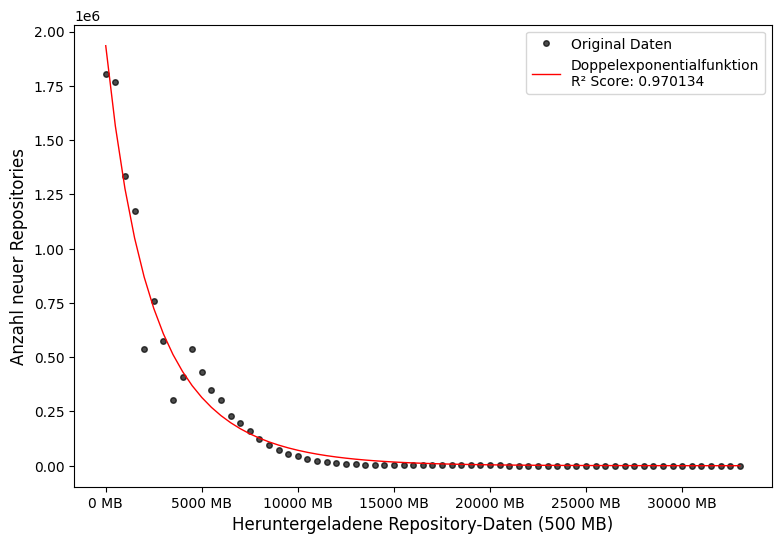

In [35]:
plt.figure(figsize=(9, 6))
plt.plot(x_data, unique_repos, 'ko', label='Original Daten', alpha=0.7, markersize=4)
plt.plot(x_data, y_fit, 'r-', linewidth=1, label=f"Doppelexponentialfunktion\nR² Score: {r2score:.6f}")

#plt.title('Approximation für den Verfall einzigartiger Repos per 500MB Repository-Daten', fontsize=14)
plt.xlabel('Heruntergeladene Repository-Daten (500 MB)', fontsize=12)
plt.ylabel('Anzahl neuer Repositories', fontsize=12)
plt.legend()
#plt.grid(True, alpha=0.3)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(mb_formatter))

plt.savefig('repo_search_decay.eps', format='eps', dpi=300, bbox_inches='tight')

In [30]:
current_x = len(unique_repos) - 1
integral_value, error_estimate = quad(integrand, current_x, 10000)
print(f"\nIntegral von {current_x*500} MB bis 5000 GB: {integral_value:.2f}")


Integral von 33000 MB bis 5000 GB: 720.20


In [12]:
plt.savefig('doppelexponential_approximation.eps', format='eps', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [22]:
10000*500

5000000